# **Proyecto 2: ChurnInsight**

## **Objetivo**

Predicción de Cancelación de Clientes.
Analizar el comportamiento de clientes para identificar patrones asociados a la cancelación del servicio (churn), como base para entrenar un modelo predictivo.

## **Propuesta**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.


Se realizará predicción mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

## **Resumen**

Empresa: Teleco
- Problema: Alta tasa de cancelación de clientes (churn)
- Objetivo del proyecto: Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

- La empresa quiere anticiparse al problema de la cancelación, respondiendo preguntas como:

1. ¿Quienes son los clientes con mayor riesgo de evasión?
2. ¿Qué variables influyen más en este comportamiento?
3. ¿Qué perfil de cliente debemos cuidar con mayor atención?

Este conocimiento es necesario para ayudar a implemenar acciones de retención y estrategias personalizadas

# A. Preparar datos para el modelado (tratamiento, codificación, normalización).

##  📌 1-Extracción

###Fuente: Data Set de Kaggle: Telco Customer Churn – https://www.kaggle.com/datasets/blastchar/telco-customer-churn
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Ruta donde se aloja el archivo CSV en GitHub.

Formato uniforme destino: DataFrame

In [ ]:
#Importar Librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#archivo = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta del archivo CSV .
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta donde se aloja el archivo CSV en GitHub.


df = pd.read_csv(URL_archivo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##🔧 2-Transformación y Limpieza de datos

### Conociendo el conjunto de datos

In [ ]:
#Cantidad de Filas y columnas
df.shape

(7043, 21)

In [ ]:
# Columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Diccionario de Datos

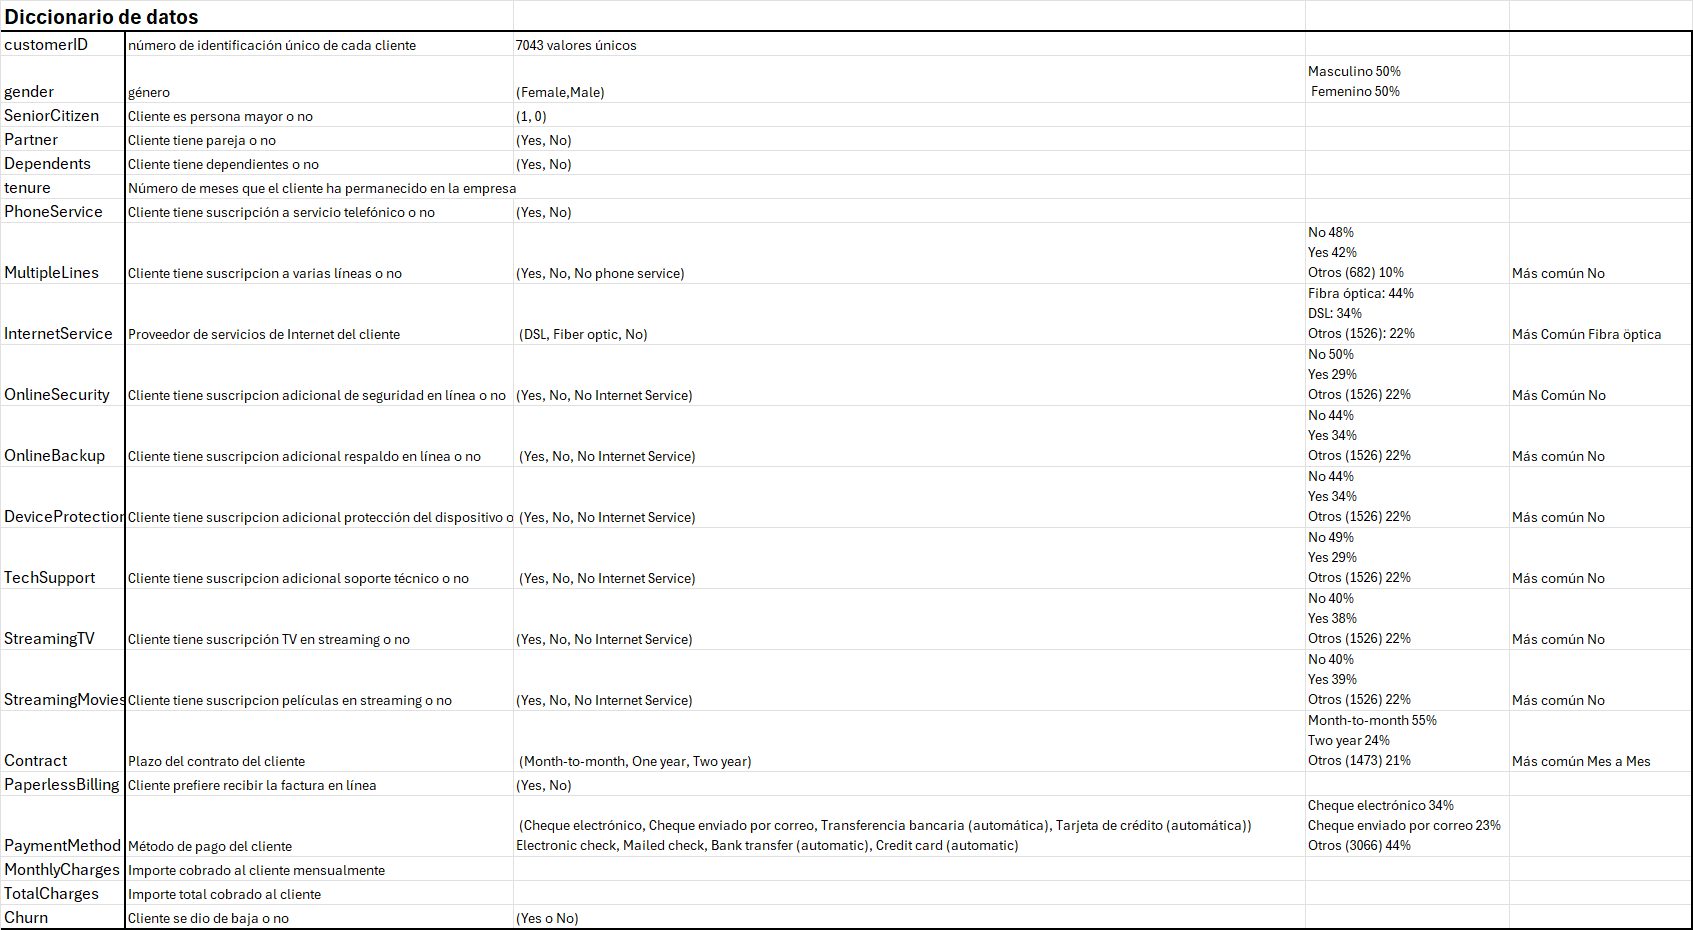

### Validar Calidad de los datos

### 1.Valores unicos

In [ ]:
# Validar valores únicos por columna
for col in df.columns: # columns values unique:
  print(f"Columna '{col}': {df[col].nunique()}")
  if df[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df[col].unique()))

  print('-' * 60) # dividir secciones

Columna 'customerID': 7043
------------------------------------------------------------
Columna 'gender': 2
gender: ['Female' 'Male']
------------------------------------------------------------
Columna 'SeniorCitizen': 2
SeniorCitizen: [0 1]
------------------------------------------------------------
Columna 'Partner': 2
Partner: ['Yes' 'No']
------------------------------------------------------------
Columna 'Dependents': 2
Dependents: ['No' 'Yes']
------------------------------------------------------------
Columna 'tenure': 73
------------------------------------------------------------
Columna 'PhoneService': 2
PhoneService: ['No' 'Yes']
------------------------------------------------------------
Columna 'MultipleLines': 3
MultipleLines: ['No phone service' 'No' 'Yes']
------------------------------------------------------------
Columna 'InternetService': 3
InternetService: ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
Columna 'OnlineSe

### 2.Números duplicados

In [ ]:
# Validar si hay numeros duplicado
duplicados = df.duplicated()
print(duplicados.sum())

0


### 3.Valores nulos

In [ ]:
## Identificar valores nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Validar si hay valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [ ]:
# Validar si hay valores en blanco o vacios
valores_vacios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

TotalCharges    11
dtype: int64


Validando o detectando anomalias

In [ ]:
df['TotalCharges'].unique()[:20]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9'], dtype=object)

Se observa que este campo es de tipo string aunque sus valores se ven como números con decimales

In [ ]:
# 11 registros en la columna TotalCharges
# posibles clientes raros
df[df['TotalCharges'].str.strip() == ''][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


### 5.Tipos de datos

##### Campo TotalCharges de object a float

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# estos son clientes nuevos que no tienen permanencia
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'Churn']].head(10)

,tenure,MonthlyCharges,Churn


Proceder a colocar con ceros los socios que tienen total charges null

In [ ]:
#df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
# Reemplazar las cadenas vacías en la columna 'account.Charges.Total' con 0
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip().replace('', '0')

In [ ]:
# Convertir la columna TotalCharges a tipo float
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
display(df.dtypes)




,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#Validando
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Estandarizacion

####🚧Remover columnas irrelevantes

Excluir variables que:

- No tienen valor predictivo.
- Son redundantes con otras.
- Pueden causar fuga de datos.

In [ ]:
# creacion df copia para depurar datos
df_depurado = df.copy()

In [ ]:
# ID Identificador de Cliente
df_depurado = df_depurado.drop(columns=['customerID'])

####🚧Agrupación de No y No service

    🎯 Objetivo

    Reducir *multicolinealidad* y simplificar los datos sin perder relevancia para el modelo predictivo.

    Varias variables de suscripcion, tenían tres categorías:

    "Yes" → cliente usa el servicio
    "No" → cliente tiene internet, pero no contrató el servicio
    "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

    Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

    Creaba correlación 1.0 entre variables
    Generaba VIF infinito
    Comprometía la estabilidad y el rendimiento de los modelos
    ✅ La solución: agrupar "No internet service" como "No"

    "Yes" = usa el servicio
    "No" = no usa el servicio (por cualquier motivo)

    Esto reduce la dimensionalidad y evita multicolinealidad.


In [ ]:
# 1: Agrupar "No internet service" como "No"
columns_suscripcion = [
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies'

]

# Todas las suscripciones anteriores tienen los valores ['No' 'Yes' 'No internet service']
# No se incluye el campo 'Suscripcion_Multiples_Lineas' porque tiene estos valores y no se puede unificar el ultimo con No ['No' 'Yes' 'No phone service']

for col in columns_suscripcion:
    df_depurado[col] = df_depurado[col].replace('No internet service', 'No')

In [ ]:
# Verificación
for col in columns_suscripcion:
    print(f"{col}: {df_depurado[col].unique()}")
print(f"{'MultipleLines'}: {df_depurado['MultipleLines'].unique()}")

OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']


In [ ]:
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##  📌 2.Análisis Exploratorio de datos (EDA)

### Analisis descriptivo

#### Datos numéricos

In [ ]:
## Variables numericas en el dataframe df_depurado
 # Estadísticas descriptivas de las columnas numéricas de un DataFrame
df_depurado.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**1. SeniorCitizen (Adulto Mayor):**

- Conteo (count): 7043. Esto indica que no hay valores nulos en esta columna, o se han manejado previamente.
- Media (mean): 0.162. Dado que los valores son 0 o 1, esto significa que aproximadamente el 16.2% de los clientes en este conjunto de datos son adultos mayores.
- Desviación estándar (std): 0.368. Sugiere la dispersión de los datos binarios.
- Mínimo (min): 0, Máximo (max): 1. Confirma que es una variable binaria.
- Cuartiles (25%, 50%, 75%): Indican que el 75% de los clientes no son adultos mayores (valor 0).

**2. tenure (Meses de Contrato):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 32.37 meses. El cliente promedio ha estado con la compañía por poco menos de 3 años.
- Desviación estándar (std): 24.55. Hay una dispersión considerable en la duración de los contratos, lo que sugiere una mezcla de clientes nuevos y antiguos.
- Mínimo (min): 0 meses. Esto es un punto importante, ya que un tenure de 0 puede indicar clientes muy nuevos (que aún no han pasado un mes completo) o datos que necesitan ser verificados.
Máximo (max): 72 meses. Equivalente a 6 años, mostrando que la compañía tiene clientes muy leales.
- Cuartiles: El 25% de los clientes tiene 9 meses o menos, la mitad (50%) tiene 29 meses o menos, y el 75% ha estado con la compañía 55 meses o menos.

**3. MonthlyCharges (Cargos Mensuales):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 64.76. El cargo mensual promedio es de aproximadamente $64.76.
- Desviación estándar (std): 30.09. Hay una variabilidad significativa en los cargos mensuales, lo que podría deberse a diferentes paquetes de servicios o planes.
- Mínimo (min): 18.25, Máximo (max): 118.75. Muestra un rango amplio de precios.
- Cuartiles: El 25% de los clientes paga $35.50 o menos, la mitad (50%) paga $70.35 o menos, y el 75% paga $89.85 o menos.

**4. TotalCharges (Cargos Totales):**

- Conteo (count): 7043. No hay valores nulos, lo que confirma que los valores vacíos fueron reemplazados por 0.
- Media (mean): 2279.73. Los cargos totales promedio son de aproximadamente $2279.73.
- Desviación estándar (std): 2266.79. Hay una gran variabilidad, lo cual es esperado ya que depende del tiempo (tenure) y de los cargos mensuales (MonthlyCharges).
- Mínimo (min): 0.00. Esto es consistente con los clientes nuevos o aquellos que tenían valores vacíos originalmente.
Máximo (max): 8684.80. Muestra clientes con altos cargos totales a lo largo del tiempo.
- Cuartiles: El 25% de los clientes tiene cargos totales de $398.55 o menos, la mitad (50%) de $1394.55 o menos, y el 75% de $3786.60 o menos.

En resumen, a partir de estos datos, podemos inferir que:

- Tenemos un porcentaje relativamente bajo de adultos mayores en la base de clientes.
- Existe una combinación de clientes nuevos y de larga data, con una duración promedio de contrato moderada.
- Hay una amplia gama de cargos mensuales y totales, lo que sugiere diversidad en los servicios o planes contratados por los clientes y en el tiempo que han permanecido con la compañía.
- El tenure mínimo de 0 y TotalCharges mínimo de 0 son consistentes y reflejan clientes muy nuevos o la imputación realizada.

In [ ]:
import plotly.express as px

fig = px.box(df_depurado, x='SeniorCitizen', y='Churn', color='Churn',
             title='Distribución de Senior Citizen (SeniorCitizen) por Churn',
             labels={'Churn': 'Churn', 'SeniorCitizen': 'SeniorCitizen'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df_depurado, x='Churn', y='tenure', color='Churn',
             title='Distribución de Tenencia (Tenure) por Churn',
             labels={'Churn': 'Cancelación', 'tenure': 'Tenencia (Meses)'})
fig.update_layout(showlegend=False) # Hide legend if color is already in x-axis
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df_depurado, x='MonthlyCharges', y='Churn', color='Churn',
             title='Distribución de Cargos Mensuales (MonthlyCharges) por Churn',
             labels={'Churn': 'Cancelación', 'MonthlyCharges': 'Cargos Mensuales'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df_depurado, x='TotalCharges', y='Churn', color='Churn',
             title='Distribución de Cargos Totales (TotalCharges) por Churn',
             labels={'Churn': 'Cancelación', 'TotalCharges': 'Cargos Totales'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

#### Datos categoricos

In [ ]:
df_depurado.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object” - categoricas

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


Para cada columna categórica, nos muestra la siguiente información:

**-count (Conteo)**: Indica el número de valores no nulos en esa columna. En tu caso, todas las columnas tienen 7043, lo que significa que no hay valores faltantes después de tu preprocesamiento.

**-unique (Únicos)**: Muestra la cantidad de valores distintos que hay en esa columna. Por ejemplo, gender tiene 2 valores únicos ('Male', 'Female'), mientras que PaymentMethod tiene 4.

**-top (Valor más frecuente)**: Es el valor que aparece con mayor frecuencia en la columna. Por ejemplo, en gender el valor top es 'Male', y en Contract es 'Month-to-month'.

**-freq (Frecuencia del valor más frecuente)**: Indica cuántas veces aparece el top valor en la columna. Así, 'Male' aparece 3555 veces y 'Month-to-month' aparece 3875 veces.

***Analizando los datos específicos se tiene:***

**1. gender**: Hay 2 géneros únicos, siendo 'Male' el más frecuente con 3555 ocurrencias, lo que sugiere una distribución casi equitativa entre géneros.

**2. Partner y Dependents**: Ambas tienen 2 valores únicos ('Yes', 'No'). Para Partner, 'No' es el más frecuente (3641), y para Dependents, 'No' también es el más frecuente (4933). Esto indica que la mayoría de los clientes no tienen pareja y no tienen dependientes.

**3. PhoneService**: Tiene 2 valores únicos, 'Yes' es el más frecuente (6361), lo que significa que la gran mayoría de los clientes tienen servicio telefónico.

**4. MultipleLines**: Tiene 3 valores únicos, siendo 'No' el más frecuente (3390). Esto incluye a quienes tienen servicio de teléfono pero una sola línea.

**5. InternetService**: Tiene 3 valores únicos, 'Fiber optic' es el más frecuente (3096), lo que sugiere que es un servicio popular entre los clientes.

**6. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**: Todas estas variables tienen 2 valores únicos ('No', 'Yes') después de agrupar 'No internet service' como 'No'. En todas ellas, 'No' es el valor más frecuente, indicando que la mayoría de los clientes no tienen estos servicios adicionales.

**7. Contract**: Tiene 3 valores únicos, siendo 'Month-to-month' el más frecuente (3875), lo que podría indicar una menor lealtad o un mayor riesgo de Churn entre estos clientes.

**8. PaperlessBilling**: Tiene 2 valores únicos, 'Yes' es el más frecuente (4171), lo que sugiere que la facturación electrónica es popular.

**9. PaymentMethod**: Tiene 4 valores únicos, siendo 'Electronic check' el más frecuente (2365).

**10. Churn**: Tiene 2 valores únicos, 'No' es el más frecuente (5174). Esto confirma que la mayoría de los clientes no han cancelado el servicio, pero también resalta el desequilibrio de clases.

En general, este analisis inicial nos da una excelente visión de las características demográficas, los servicios contratados y los patrones de pago de los clientes, lo cual es fundamental para entender qué factores podrían influir en la cancelación del servicio.

#### Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


# Generate data for the bar chart (counts of churn)
churn_counts = df_depurado['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Define a consistent mapping for text labels and colors
churn_map_labels = {'No': 'Activos', 'Yes': 'De Baja'}
churn_map_colors = {'Activos': 'blue', 'De Baja': 'red'}

churn_counts['Churn_Text'] = churn_counts['Churn'].map(churn_map_labels)

# Sort by the original 'Churn' column ('No' then 'Yes') for consistent plotting order
churn_counts = churn_counts.sort_values('Churn', ascending=False) # 'No' first, then 'Yes'

# Add bar traces for each churn category to the first subplot
for index, row in churn_counts.iterrows():
    fig_subplots.add_trace(go.Bar(x=[row['Churn_Text']], y=[row['Count']],
                                 text=[row['Count']], textposition='auto',
                                 marker_color=churn_map_colors[row['Churn_Text']],
                                 name=row['Churn_Text'],
                                 showlegend=True, legendgroup='group1'),
                              row=1, col=1)


# Prepare data for the pie chart (Overall Churn Percentage)
overall_churn_rate = df_depurado['Churn'].value_counts(normalize=True) * 100

# Ensure labels and colors match the sorted order
labels_pie = overall_churn_rate.index.map(churn_map_labels).tolist()
values_pie = overall_churn_rate.values.tolist()
pie_colors = [churn_map_colors[churn_map_labels[i]] for i in overall_churn_rate.index]

# Add pie chart trace to the second subplot
fig_subplots.add_trace(go.Pie(labels=labels_pie, values=values_pie, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors),
                              showlegend=True, legendgroup='group2'),
                       row=1, col=2)

# Update layout (main title and legend)
fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='Análisis de Cancelación', font=dict(size=18), x=0.5, xanchor='center'),
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle'))

# Show the combined figure
fig_subplots.show()

# Export the figure
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


#### Distribución absoluta de la variable churn

In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


##### Distribucion porcentual

In [ ]:
df_depurado['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


##### Distribución de Churn

No: 5,174 clientes → 73.46%

Yes: 1,869 clientes → 26.54%

##### Explorar la Demografía vs Churn

In [ ]:
pd.crosstab(df_depurado['gender'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


##### 🧠 Interpretación

Diferencia mínima (<1%)

👉 Género NO es un driver fuerte de churn

Esto es bueno: evita sesgos innecesarios

📌 Conclusión: variable débil, poco valor predictivo por sí sola.

###### SeniorCitizen vs Churn

In [ ]:
pd.crosstab(df_depurado['SeniorCitizen'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


##### 🧠 Interpretación

Los adultos mayores churnean casi el doble

Diferencia: +18 puntos

📌 Insight de negocio

Los clientes senior necesitan mejor soporte, planes más simples o atención diferenciada.

###### Partner vs Churn


In [ ]:
pd.crosstab(df_depurado['Partner'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


##### 🧠 Interpretación

Tener pareja reduce churn drásticamente

Estabilidad familiar = estabilidad como cliente

📌 Insight:

Clientes con pareja están más “anclados” al servicio.

##### Dependents vs Churn

In [ ]:
pd.crosstab(df_depurado['Dependents'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


##### 🧠 Interpretación

Dependientes protegen aún más que la pareja

Clientes con hijos/personas a cargo valoran continuidad

📌 Insight fuerte:

Hogares familiares son los más leales.

##### 🧠 Conclusión

  Variable	Impacto
-> Gender	❌ Bajo
->SeniorCitizen	🔥 Alto
->Partner	🔥 Alto
->Dependents	🔥 Muy alto

#### Servicios vs Churn

##### InternetService vs Churn

In [ ]:
pd.crosstab(df_depurado['InternetService'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


##### Servicios de valor agregado

In [ ]:
services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in services:
    print(f'\n{col}')
    print(pd.crosstab(df_depurado[col], df['Churn'], normalize='index') * 100)



OnlineSecurity
Churn                  No        Yes
OnlineSecurity                      
No              68.670382  31.329618
Yes             85.388806  14.611194

OnlineBackup
Churn                No        Yes
OnlineBackup                      
No            70.827915  29.172085
Yes           78.468506  21.531494

DeviceProtection
Churn                    No        Yes
DeviceProtection                      
No                71.348193  28.651807
Yes               77.497936  22.502064

TechSupport
Churn               No        Yes
TechSupport                      
No           68.813763  31.186237
Yes          84.833659  15.166341

StreamingTV
Churn               No        Yes
StreamingTV                      
No           75.668819  24.331181
Yes          69.929812  30.070188

StreamingMovies
Churn                   No        Yes
StreamingMovies                      
No               75.620506  24.379494
Yes              70.058565  29.941435


##### **Servicios vs Churn (Interpretación)**
### 🔐 OnlineSecurity

Estado	Churn %

No	41.77% 🚨

Yes	14.61% ✅

No internet service	7.40%

🧠 Lectura

No tener seguridad casi triplica el churn

**Es uno de los drivers más fuertes**

Servicio altamente protector

### 💾 OnlineBackup

Estado	Churn %

No	39.93%

Yes	21.53%

No internet service	7.40%


📌 Menos fuerte que seguridad, pero sigue siendo clave.

### 📱 DeviceProtection

Estado	Churn %

No	39.13%

Yes	22.50%


👉 Protege, pero no tanto como seguridad o soporte.

### 🛠️ TechSupport (MUY IMPORTANTE)

Estado	Churn %

No	41.64% 🚨

Yes	15.17% ✅


**🔥 Segundo driver más fuerte junto a OnlineSecurity**

📌 Insight claro:

Clientes sin soporte técnico se van cuando algo falla.

### 📺 StreamingTV / Movies

Servicio	Churn % (Yes)

StreamingTV	~30%

StreamingMovies	~30%


🧠 Interpretación:

Poco impacto real

Son servicios “nice to have”

No retienen clientes

###🌐 “No internet service”

| Churn % | 7.40% |

👉 Clientes sin internet:

Servicio **simple**

Factura baja

Muy estables

#### **Contrato y pagos (EL DRIVER #1)**




#### Contract vs Churn

In [ ]:
pd.crosstab(df_depurado['Contract'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


#### PaymentMethod vs Churn

In [ ]:
pd.crosstab(df_depurado['PaymentMethod'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


#### PaperlessBilling vs Churn

In [ ]:
pd.crosstab(df_depurado['PaperlessBilling'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


#### Contrato y Pagos (worst offender #1)
📑 Contract vs Churn (worst offender)
Contrato	Churn %

**Month-to-month	42.71% 🚨🚨🚨**

One year	11.27%

Two year	2.83% ✅

🧠 Interpretación

Contrato mensual = cliente sin compromiso

Contrato 2 años = cliente casi imposible de perder

📌 Insight clave:

El churn NO es aleatorio, está estructuralmente ligado al tipo de contrato.

#### 💳 PaymentMethod vs Churn

| Método               | Churn %       |
| -------------------- | ------------- |
| Electronic check     | **45.29%** 🚨 |
| Mailed check         | 19.11%        |
| Bank transfer (auto) | 16.71%        |
| Credit card (auto)   | 15.24%        |

🧠 Interpretación

Electronic check es altísimo riesgo

Pagos automáticos = retención

📌 Insight:

Fricción en el pago = churn.


#### PaperlessBilling vs Churn

| Facturación electrónica | Churn %    |
| ----------------------- | ---------- |
| Yes                     | **33.57%** |
| No                      | 16.33%     |

🧠 Interpretación:

Paperless billing no es causa directa

Está correlacionada con:

Contrato mensual

Electronic check


#### impacto por variables

| Variable         | Impacto        |
| ---------------- | -------------- |
| Contract         | 🔥🔥🔥🔥       |
| PaymentMethod    | 🔥🔥🔥         |
| PaperlessBilling | 🔥 (indirecto) |




#### Variables numéricas

##### Tenure vs Churn

In [ ]:
df_depurado.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


MonthlyCharges vs Churn

In [ ]:
df.groupby('Churn')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


TotalCharges vs Churn

In [ ]:
df.groupby('Churn')['TotalCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


#### Variables numéricas (Interpretación)



#####⏳ Tenure vs Churn (EL FACTOR TEMPORAL)

| Métrica | No Churn       | Churn          |
| ------- | -------------- | -------------- |
| Media   | **37.6 meses** | **18.0 meses** |
| Mediana | **38 meses**   | **10 meses**   |
| Q1      | 15             | 2              |


🧠 Lectura

Clientes que se van:

Son mucho más nuevos

La mitad se va antes del mes 10

Retención ocurre después de los primeros meses críticos

📌 Insight:

Si sobrevives el primer año, es muy probable que te quedes.

##### 💰 MonthlyCharges vs Churn
| Métrica | No    | Yes       |
| ------- | ----- | --------- |
| Media   | 61.27 | **74.44** |
| Mediana | 64.43 | **79.65** |



🧠 Lectura

Churn = facturas más altas

Clientes sienten que no vale lo que pagan

📌 Insight:

Precio alto sin servicios críticos = abandono.

##### 🧾 TotalCharges vs Churn

| Métrica | No          | Yes        |
| ------- | ----------- | ---------- |
| Mediana | **1679.53** | **703.55** |


🧠 Lectura

TotalCharges refleja tenure

Clientes churn:

Poco tiempo

Poco valor acumulado

👉 Variable útil, pero redundante con tenure.

# B. Análisis de correlación y selección de variables.

¿Cuáles factores están relacionados con el churn_yes = cancelacion? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

- 1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- 0: no hay relación lineal entre las variables.
- 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

## 🔍 Correlación entre variables

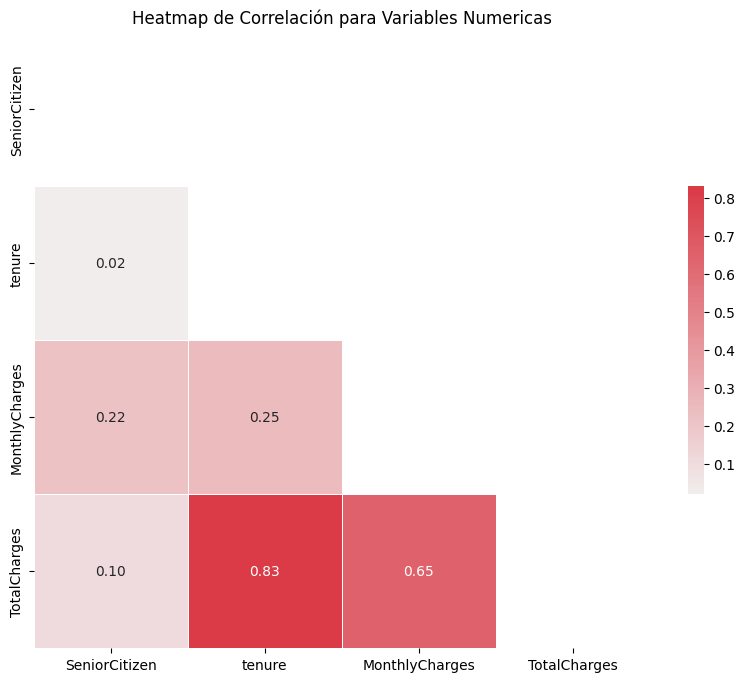

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas seleccionadas para continuar con los modelos y predicciones
columnas_numericas = df_depurado.select_dtypes(include=['int64', 'float64']).columns

# Seleccionar solo las columnas deseadas del DataFrame codificado
df_variables_numericas = df_depurado[columnas_numericas]

# Calcular la matriz de correlación para las columnas seleccionadas
corr_variables_numericas = df_variables_numericas.corr()

# Generar una máscara para el triángulo superior (opcional, para mejor visualización)
mascara = np.triu(np.ones_like(corr_variables_numericas, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    np.round(corr_variables_numericas, 2), # Redondear valores para mejor lectura
    annot=True,                    # Mostrar valores en las celdas
    fmt=".2f",                     # Formato de los valores (2 decimales)
    cmap=cmap,                     # Mapa de colores
    center=0,                      # Centro del mapa de colores en 0
    square=True,                   # Celdas cuadradas
    linewidths=0.5,                # Líneas entre celdas
    cbar_kws={"shrink": 0.5},      # Barra de color
    mask=mascara                   # Aplicar máscara
)

plt.title('Heatmap de Correlación para Variables Numericas')
plt.show()

In [ ]:
columnas_numericas

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Aqui se observa que es interesante analizar la mayor correlacion en las variables

¿Qué factores están más correlacionados?

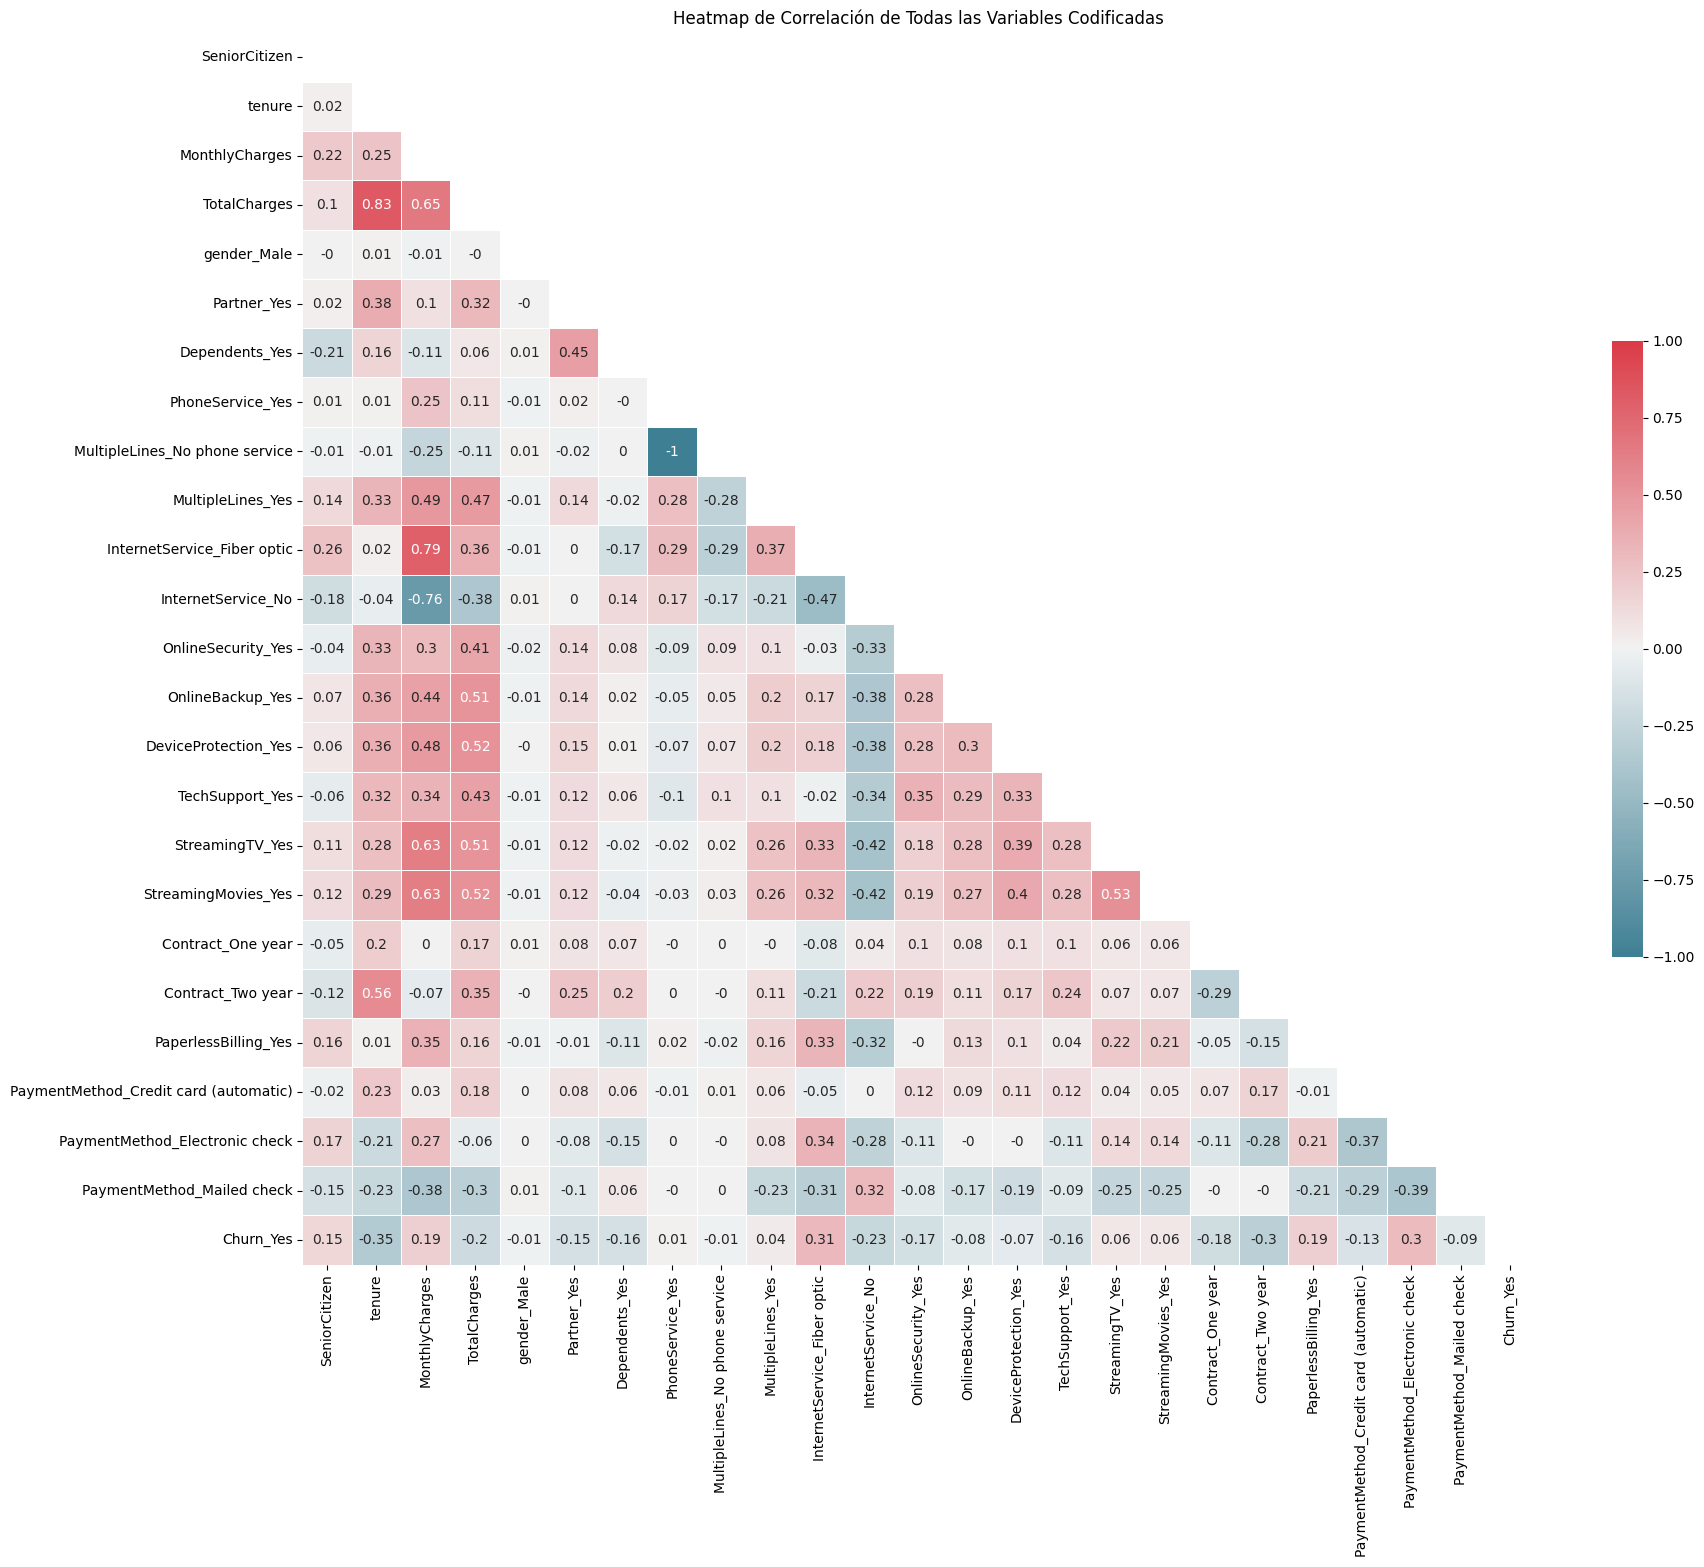

In [ ]:
# Mapa de calor para ver las correlaciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Identificar columnas categóricas
columns_categoricas = df_depurado.select_dtypes(include='object').columns

# 2. Realizar One-Hot Encoding en df_depurado para crear df_encoded
# Se usa drop_first=True para evitar multicolinealidad perfecta en las dummies
df_encoded = pd.get_dummies(df_depurado, columns=columns_categoricas, drop_first=True)

# 3. Calcular la matriz de correlación del DataFrame codificado
corr = df_encoded.corr()

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(20,16))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(np.round(corr, 2), mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .5})

# Mostrar el mapa de calor (heatmap)
plt.title('Heatmap de Correlación de Todas las Variables Codificadas')
plt.show()

Genera muchos datos dificiles de interpetar y analizar, tiene muchos valores, columnas. Esta no es la manera mas sencilla de interpetar.

Entonces se aplica una mascara se filtra, usando una tasa para tener una correlacion mas cercana a nuestra variable churn_yes en mi caso Cancelacion_1.

Nota: Se pueden reordenar columnas de df, dejar al final la variable de respuesta al final, para que sea mas legible.

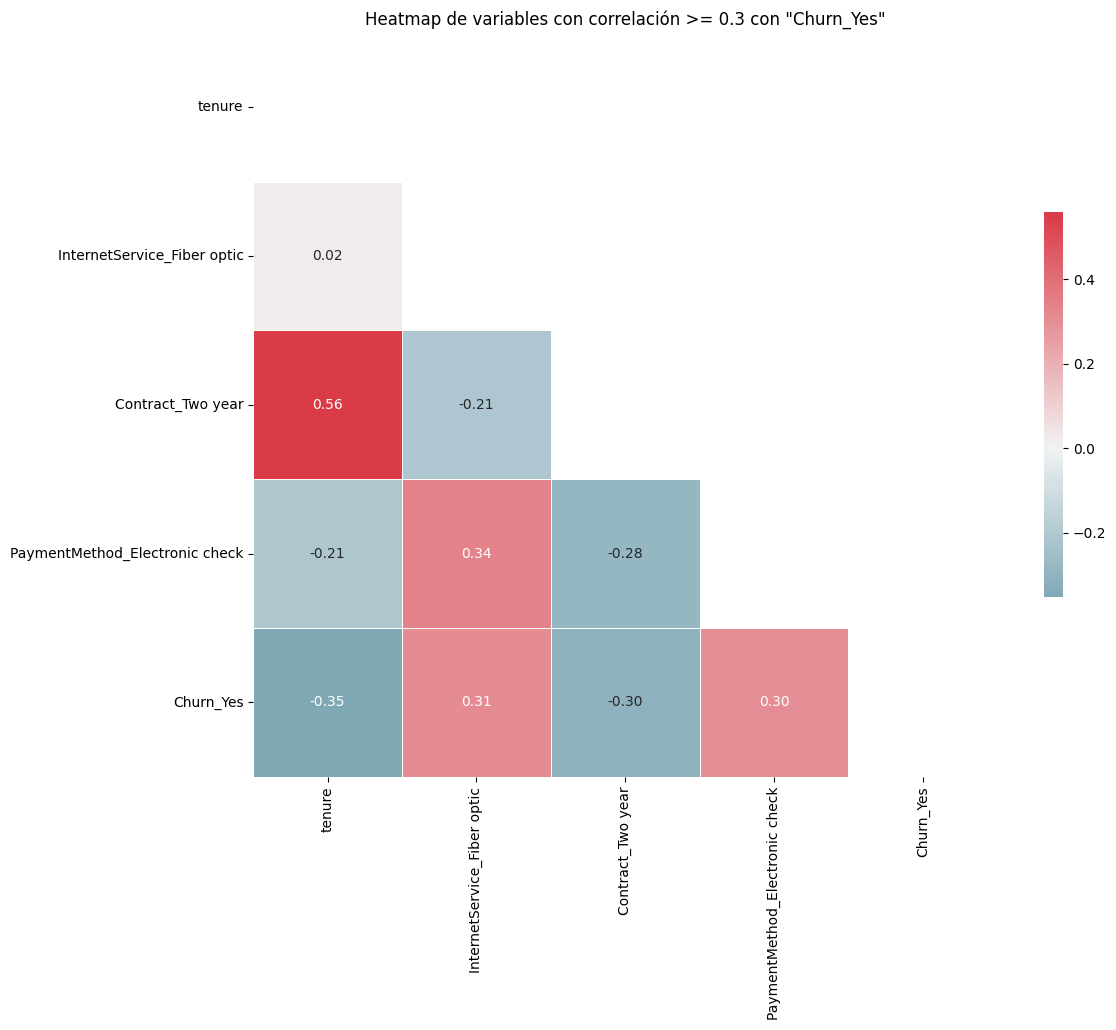

In [ ]:
# Mapa de calor para ver las correlaciones mas cercanas a la variable Cancleacion_1 = Churn_Yes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.3  #0.07  # 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

Al ver los coeficientes de correlación de cada variable con `Churn_Yes`, vamos a identificar las variables con un coeficiente de correlación cuyo valor absoluto es mayor o igual a 0.30 y explicar qué podemos inferir de ellas.

*   **Correlación Positiva (coeficiente > 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación también tiende a aumentar.
*   **Correlación Negativa (coeficiente < 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación tiende a disminuir (o a medida que disminuye, la probabilidad de cancelación aumenta).


Aquí están las variables que cumplen ese criterio en los datos y su posible interpretación:

---

✅ **Análisis del heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.3** (o ≤ -0.3) con la variable objetivo `Churn_Yes`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                    | Correlación con Churn_Yes            | Interpretación (Inferencia)                                                                                                                               |
| :------------------------------------------ | :----------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `tenure`                                    | **-0.35** Negativa (moderada a fuerte) | Cuanto mayor el tiempo como cliente (`tenure`), menor la probabilidad de `churn`. Esto es un patrón esperado: los clientes más antiguos son más leales.      |
| `InternetService_Fiber optic`               | **+0.31** Positiva (moderada)        | Los clientes con servicio de `Fibra Óptica` tienen una mayor probabilidad de `churn`. Esto podría estar relacionado con expectativas de servicio, costos, o la agresividad de la competencia en ese segmento. |
| `Contract_Two year`                         | **-0.30** Negativa (moderada)        | Tener un `contrato de dos años` está fuertemente asociado con una menor probabilidad de `churn`. Los contratos a largo plazo generan mayor compromiso y estabilidad del cliente. |
| `PaymentMethod_Electronic check`            | **+0.30** Positiva (moderada)        | Los clientes que usan `cheque electrónico` como método de pago tienen una mayor probabilidad de `churn`. Esto podría indicar un perfil de cliente menos fidelizado o problemas de fricción en el proceso de pago. |

**Variables que se acercan al umbral de 0.30 y que también son relevantes (aunque no se muestran en el heatmap filtrado con el umbral de 0.3):**

*   `SeniorCitizen_Yes`: **+0.15** (positiva, baja). Los adultos mayores tienen una probabilidad ligeramente mayor de `churn`.
*   `MonthlyCharges`: **+0.19** (positiva, baja). Cargos mensuales más altos se asocian con una probabilidad ligeramente mayor de `churn`.
*   `TotalCharges`: **-0.19** (negativa, baja). Cargos totales más bajos se asocian con mayor `churn` (lo cual es lógico dado `tenure`).

En resumen, estas variables con coeficientes de correlación de alto valor absoluto dan una visión inicial clara de los factores que, linealmente, están más asociados con la cancelación en los datos: la **antigüedad del cliente**, el **tipo de contrato**, el **tipo de servicio de internet** y el **método de pago**. Estos son puntos clave para investigar más a fondo y para enfocar estrategias de retención.

In [ ]:
df_encoded.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool
MultipleLines_Yes,bool


### ## Relacionando variables - Analisis inicial con el PairPlot de Seaborn

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

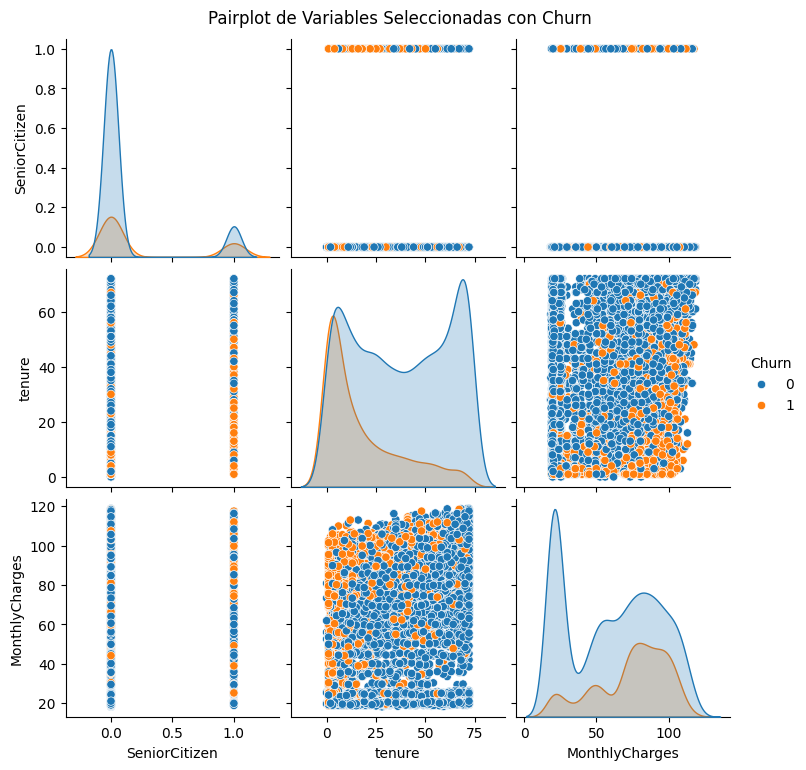

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Re-definir columnas_seleccionadas 
columnas_seleccionadas = [
    'SeniorCitizen',
    'tenure',
    'MonthlyCharges',
    'InternetService',
    'TechSupport',
    'Contract',
    'PaymentMethod',
    'Churn'
]

# Crear df_seleccionado 
df_seleccionado = df_depurado[columnas_seleccionadas].copy()

# Convertir la columna 'Churn' a numérico para pairplot si es necesario
df_seleccionado['Churn'] = df_seleccionado['Churn'].map({'Yes': 1, 'No': 0})

# sns.pairplot(corr_seleccionada) # Esto no es apropiado para una matriz de correlación
# sns.pairplot es para visualizar relaciones entre columnas de un DataFrame de datos
sns.pairplot(df_seleccionado, hue='Churn')
plt.suptitle('Pairplot de Variables Seleccionadas con Churn', y=1.02) # Ajusta el título para evitar que se superponga
plt.show()

Analisis de esta gráfica:

1. En la Diagonal (Distribuciones Individuales por 'Churn'):

- tenure (Antigüedad): Observarás que los clientes que no cancelan (azul) tienden a tener una distribución sesgada hacia una tenure más alta, con muchos clientes de larga duración. Por el contrario, los clientes que sí cancelan (rojo) se concentran mucho más en valores bajos de tenure, lo que refuerza la idea de que el churn es más frecuente en clientes nuevos.
- MonthlyCharges (Cargos Mensuales): Los clientes que cancelan (rojo) muestran una distribución con picos en cargos mensuales más altos, especialmente en el rango medio-alto. Esto sugiere que los clientes con facturas mensuales más elevadas son más propensos a irse.
- SeniorCitizen (Adulto Mayor): Como es una variable binaria (0/1), verás que la proporción de 'Adultos Mayores' es mayor entre los que cancelan (rojo), lo que indica una mayor vulnerabilidad al churn en este segmento.

2. Fuera de la Diagonal (Relaciones entre Pares de Variables por 'Churn'):

- tenure vs MonthlyCharges: Aquí es donde se ve una de las relaciones más interesantes. Los puntos rojos (clientes que cancelan) tienden a concentrarse en la parte inferior izquierda (clientes nuevos con cargos bajos) y superior izquierda (clientes nuevos con cargos altos). Es decir, muchos clientes que cancelan tienen poca tenure, independientemente de sus MonthlyCharges.
Los clientes con mucha tenure (hacia la derecha en el eje X de tenure) son predominantemente azules (no cancelan).
- Variables Categóricas (InternetService, TechSupport, Contract, PaymentMethod) vs Numéricas (tenure, MonthlyCharges):
Puedes ver, por ejemplo, que para InternetService='Fiber optic', la concentración de puntos rojos es mayor, especialmente con MonthlyCharges más altos y tenure baja.
De manera similar, los contratos 'Month-to-month' (Contract en el eje Y) mostrarán una mayor densidad de puntos rojos y distribuciones de tenure más cortas en comparación con 'Two year' contracts.
Los PaymentMethod como 'Electronic check' también estarán asociados a una mayor presencia de puntos rojos.

En resumen, este pairplot nos permite confirmar visualmente muchos de los hallazgos de nuestro Análisis Exploratorio de Datos (EDA):

- La antigüedad (tenure) es un factor crítico: los clientes nuevos tienen un alto riesgo de churn.
- Los MonthlyCharges altos están asociados con la cancelación.
- Las variables categóricas como InternetService (especialmente fibra óptica), Contract (mes a mes) y PaymentMethod (cheque electrónico) son claras influencias en la tasa de churn.

Esta visualización integral ayuda a entender no solo las distribuciones de las variables, sino también cómo interactúan entre sí en relación con la decisión del cliente de cancelar el servicio.

In [ ]:
# importando los paquetes - bibliotecas para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-2987943264.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




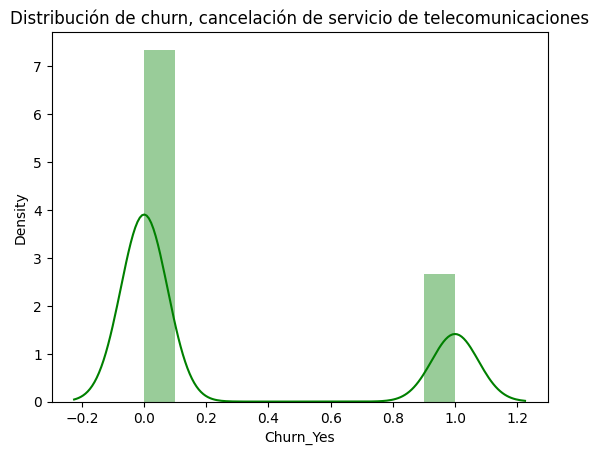

In [ ]:
#Quién es nuestra variable de respuesta? Churn = Yes
sns.distplot(df_encoded['Churn_Yes'],kde=True,color='green')
plt.title('Distribución de churn, cancelación de servicio de telecomunicaciones')
plt.show()

El histograma confirma visualmente que el conjunto de datos está desbalanceado en cuanto a la variable objetivo Churn_Yes. La clase mayoritaria son los clientes que no cancelaron, y la clase minoritaria son los clientes que sí cancelaron.

Este desbalance es importante porque puede afectar el rendimiento de algunos modelos de clasificación, haciendo que tiendan a predecir la clase mayoritaria con más frecuencia. Por eso, pasos posteriores como el uso de técnicas de balanceo (SMOTE o Undersampling) son necesarios para entrenar modelos que puedan identificar mejor la clase minoritaria (los clientes que cancelan), que es la que nos interesa predecir para la estrategia de retención.

En resumen, el histograma sirve como una confirmación visual clara del desbalance en tu variable objetivo.

##Análisis de variables numéricas

Para las variables numéricas se analizó su relación con la variable objetivo (Churn) mediante estadísticos descriptivos y análisis de correlación.
El objetivo fue identificar variables con mayor poder explicativo y detectar posibles problemas de multicolinealidad.

Las variables evaluadas fueron:

- tenure
- MonthlyCharges
- SeniorCitizen
- TotalCharges (evaluada como variable opcional)

El análisis mostró:

- Una relación inversa significativa entre tenure y Churn, indicando que clientes con mayor antigüedad tienden a cancelar menos.

- Una relación positiva entre MonthlyCharges y Churn, donde cargos más altos se asocian a mayor probabilidad de cancelación.

- SeniorCitizen presenta una relación moderada con churn.

- Se detectó alta correlación entre tenure y TotalCharges, por lo que se decidió utilizar únicamente tenure en el modelo base para evitar multicolinealidad.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [ ]:
df_corr = df[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'Churn']].copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})


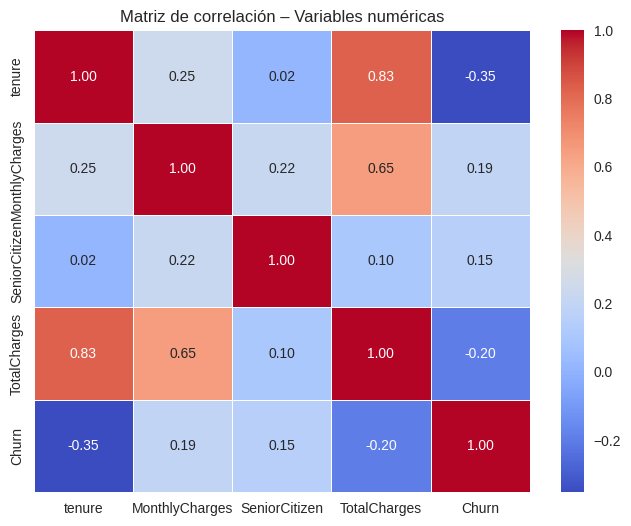

In [ ]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de correlación – Variables numéricas")
plt.show()


📌 Esto justifica:

*tenure* ↓ churn

*MonthlyCharges* ↑ churn

*correlación* tenure vs TotalCharges

##Análisis de variables categóricas

Se evaluaron mediante tasas de churn por categoría y gráficos comparativos, permitiendo una interpretación clara del comportamiento de los clientes.

Las variables categóricas analizadas fueron:

- Contract
- InternetService
- PaymentMethod
- TechSupport

Los principales hallazgos fueron:

- Los clientes con contrato month-to-month presentan una tasa de churn significativamente mayor.

- Los usuarios de servicio de fibra óptica muestran mayor propensión a cancelar en comparación con otros tipos de servicio.

- El método de pago Electronic check está asociado a mayores tasas de churn.

- Los clientes que cuentan con TechSupport activo presentan menor tasa de cancelación.

Estas variables fueron seleccionadas para el modelo debido a su clara relación con el churn y su relevancia desde el punto de vista del negocio.

In [ ]:
def plot_churn_rate(df, column):
    churn_rate = (
        df.groupby(column)['Churn']
        .value_counts(normalize=True)
        .rename('rate')
        .reset_index()
    )

    churn_rate = churn_rate[churn_rate['Churn'] == 'Yes']

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=churn_rate,
        x=column,
        y='rate',
        palette='Blues_d'
    )
    plt.title(f"Tasa de churn por {column}")
    plt.ylabel("Proporción de churn")
    plt.xlabel(column)
    plt.ylim(0, churn_rate['rate'].max() + 0.05)
    plt.xticks(rotation=30)
    plt.show()


- Contract : 📌 Insight esperado:

Month-to-month con mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




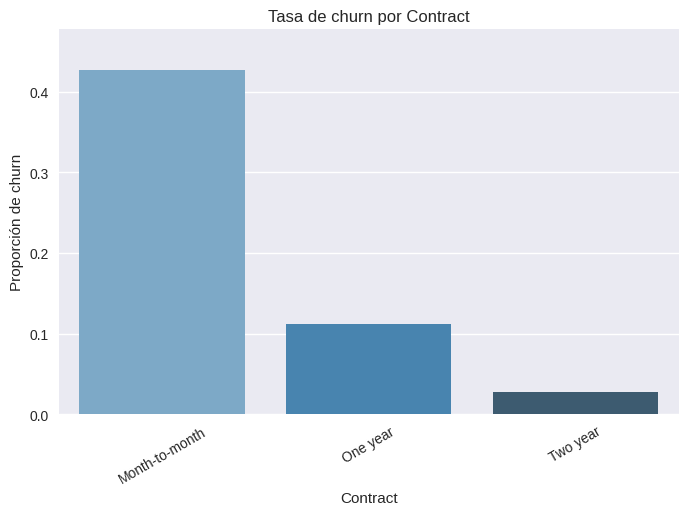

In [ ]:
plot_churn_rate(df, 'Contract')

- InternetService: 📌 Insight esperado

Fiber optic con mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




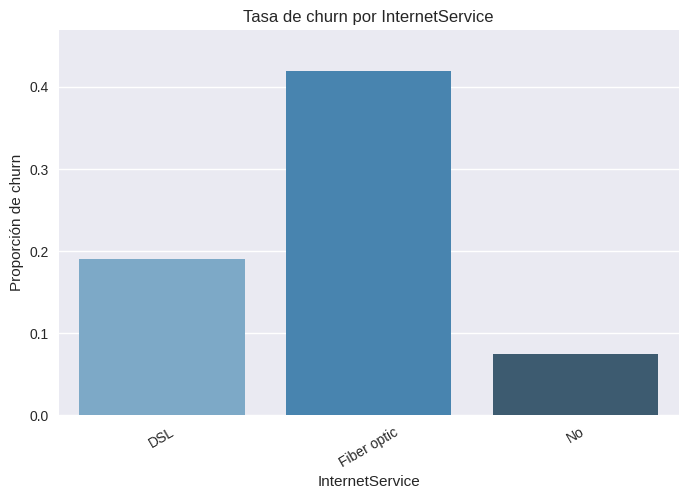

In [ ]:
plot_churn_rate(df, 'InternetService')

- PaymentMethod: 📌 Insight esperado:

Electronic check asociado a mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




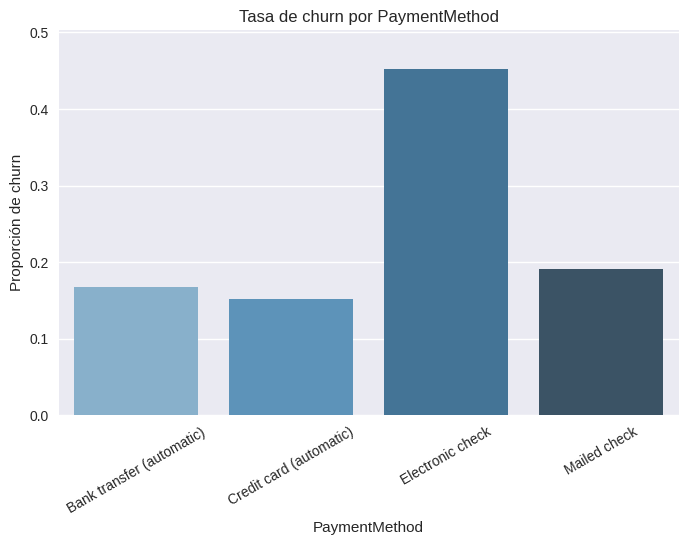

In [ ]:
plot_churn_rate(df, 'PaymentMethod')

- TechSupport: 📌 Insight esperado:

Menor churn cuando el soporte está activo

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




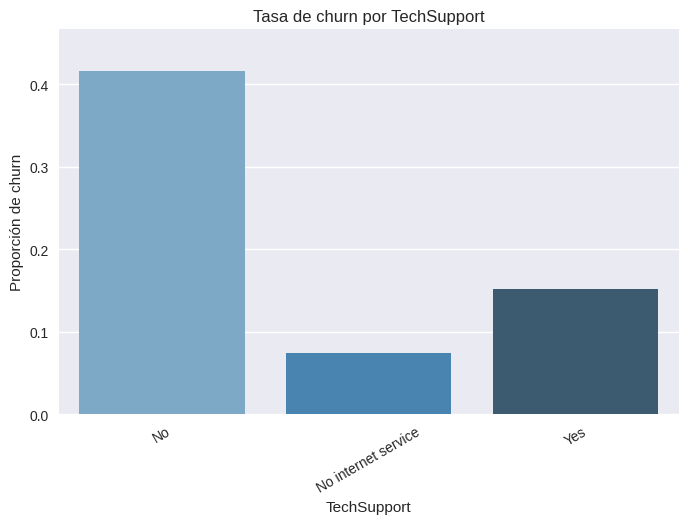

In [ ]:
plot_churn_rate(df, 'TechSupport')

##Variables descartadas y opcionales

Algunas variables fueron descartadas o consideradas opcionales debido a su bajo impacto en la predicción o a relaciones débiles con la variable objetivo.

Variables descartadas:

- StreamingTV
- StreamingMovies
- gender
- customerID

“No se observa relación significativa con churn.”

Variables opcionales para futuras iteraciones:

- OnlineSecurity
- Partner
- Dependents
- TotalCharges

Estas variables podrán evaluarse en iteraciones posteriores del modelo para analizar posibles mejoras en el desempeño.

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




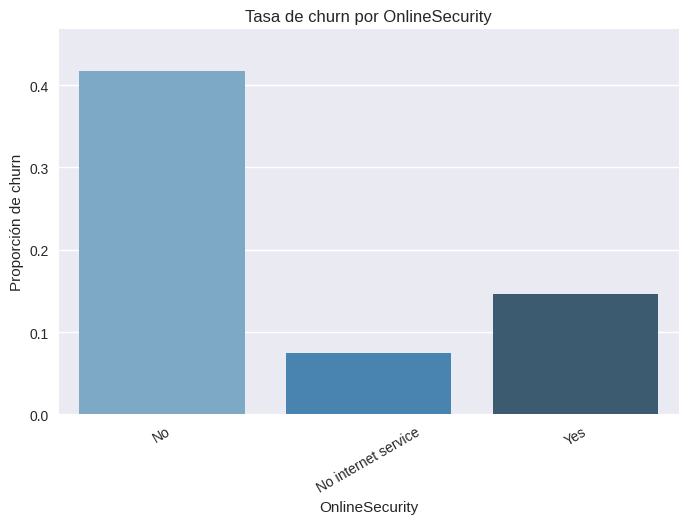

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




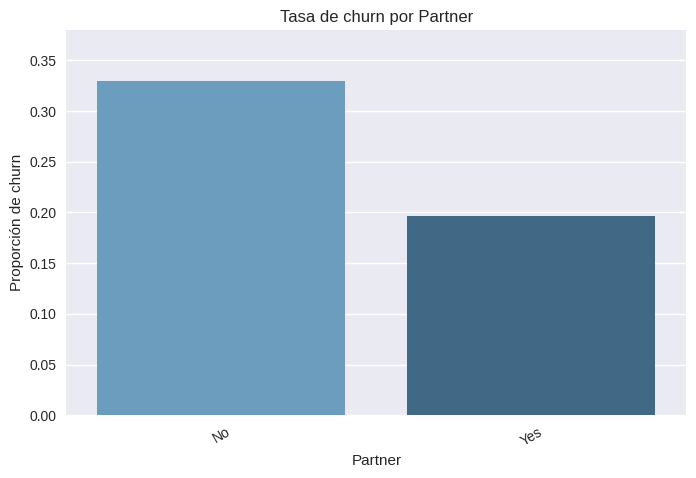

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




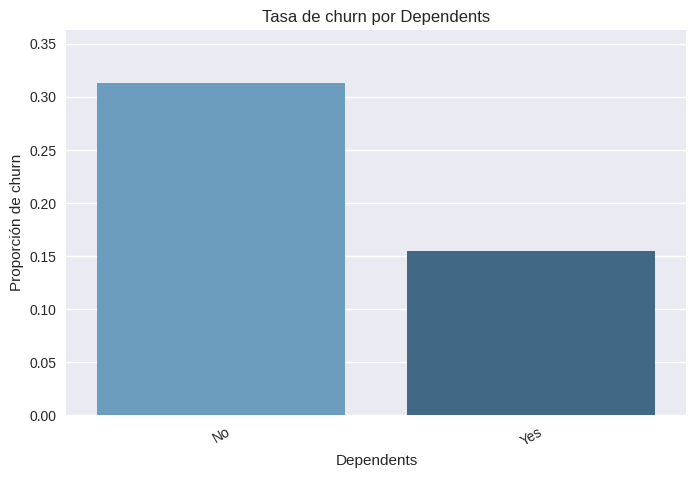

In [ ]:
plot_churn_rate(df, 'OnlineSecurity')
plot_churn_rate(df, 'Partner')
plot_churn_rate(df, 'Dependents')

El análisis exploratorio permitió identificar las variables con mayor relación con churn.
Las variables numéricas se evaluaron mediante correlación, mientras que las categóricas
se analizaron a través de tasas de churn por categoría.
Con base en estos resultados, se seleccionaron únicamente las variables con mayor
impacto para el modelo base.

##Selección final de variables

Con base en el análisis exploratorio, se definió un conjunto final de variables para el modelo base, priorizando simplicidad, interpretabilidad y reducción de ruido.

Las transformaciones necesarias para estas variables se implementan posteriormente en la etapa de Feature Engineering.

##🧠 Resumen EDA
🔥 Principales drivers de churn

1️⃣ Contract (Month-to-month)

2️⃣ Electronic check

3️⃣ No TechSupport / No OnlineSecurity

4️⃣ SeniorCitizen

5️⃣ Tenure bajo (< 12 meses)

6️⃣ MonthlyCharges altos

🎯 Segmento de mayor riesgo

Clientes nuevos, con contrato mensual,
factura alta, sin soporte ni seguridad,
que pagan con electronic check.

💡 Acciones de negocio sugeridas

Migrar clientes mensuales a contratos anuales

Bundles con TechSupport + OnlineSecurity

Incentivos en los primeros 3–6 meses

Programas específicos para seniors

Eliminar fricción en pagos

## Conclusiones del EDA

- Los clientes con contratos mes a mes presentan mayor tasa de cancelación.
- Un mayor tiempo de permanencia reduce significativamente el churn.
- Cargos mensuales elevados están asociados a mayor probabilidad de cancelación.
- Servicios adicionales como soporte técnico parecen reducir el churn.

## Selección final de variables para el modelo

| Variable | Tipo | Se usa en el modelo | Justificación |
|--------|------|---------------------|---------------|
| tenure | Numérica | ✅ Sí | Alta relación inversa con churn |
| MonthlyCharges | Numérica | ✅ Sí | Cargos altos aumentan churn |
| SeniorCitizen | Numérica | ✅ Sí |
| Contract | Categórica | ✅ Sí | Contrato mes a mes presenta mayor churn |
| InternetService | Categórica | ✅ Sí | Fibra óptica muestra mayor cancelación |
| PaymentMethod | Categórica | ✅ Sí | Cheque electrónico asociado a churn |
| TechSupport | Categórica | ✅ Sí | Reduce churn cuando está activo |
| OnlineSecurity | Categórica | ⚠️ Opcional | Puede mejorar señal de retención |
| StreamingTV | Categórica | ❌ No | Bajo impacto en churn |
| StreamingMovies | Categórica | ❌ No | Bajo impacto en churn |
| gender | Categórica | ❌ No | No muestra relación significativa |
| TotalCharges | Numérica | ⚠️ Opcional| Resume relación cliente–empresa |
| Partner | Categórica | ⚠️ Opcional | Relación leve |
| Dependents | Categórica | ⚠️ Opcional | Relación leve |
| customerID | ID | ❌ No | Identificador, sin valor predictivo |

A partir del análisis exploratorio, se seleccionaron variables con impacto claro en la cancelación de clientes.
La priorización se realizó considerando relación con churn, interpretabilidad y simplicidad del modelo,
buscando un balance entre desempeño y claridad para el negocio.

** #🎯 Resultado FINAL del EDA**

Después de analizar distribuciones, relaciones con Churn y coherencia de negocio, el EDA concluye lo siguiente:

🧠 Variables seleccionadas como principales para el modelo
📊 Cuadro resumen post-EDA (VARIABLES DE PESO)

## Variables finales seleccionadas tras el EDA

| Variable | Tipo | Decisión | Justificación basada en EDA |
|--------|------|----------|-----------------------------|
| tenure | Numérica | ✅ Usar | Relación inversa fuerte con churn. Clientes con menor antigüedad cancelan más. |
| MonthlyCharges | Numérica | ✅ Usar | Cargos mensuales altos se asocian a mayor probabilidad de churn. |
| SeniorCitizen | Numérica | ✅ Sí |
| Contract | Categórica | ✅ Usar | Contratos mes a mes presentan la mayor tasa de cancelación. |
| InternetService | Categórica | ✅ Usar | Clientes con fibra óptica muestran mayor churn. |
| PaymentMethod | Categórica | ✅ Usar | El pago por cheque electrónico se asocia a mayor churn. |
| TechSupport | Categórica | ✅ Usar | Contar con soporte técnico reduce significativamente la cancelación. |


🟡 Variables secundarias (opcionales)

Estas no son malas, pero su impacto es menor o redundante.

| Variable | Decisión | Motivo |
|--------|----------|--------|
| OnlineSecurity | ⚠️ Opcional | Puede aportar señal de retención, impacto moderado. |
| Partner | ⚠️ Opcional | Relación leve con churn. |
| Dependents | ⚠️ Opcional | Impacto bajo en comparación con otras variables. |
| TotalCharges | ⚠️ Opcional| Resume relación cliente–empresa |



A partir del análisis exploratorio, se seleccionaron variables con impacto claro en la cancelación de clientes.
La priorización se realizó considerando relación con churn, interpretabilidad y simplicidad del modelo,
buscando un balance entre desempeño y claridad para el negocio.

❌ Variables descartadas tras el EDA

| Variable | Motivo de exclusión |
|--------|---------------------|
| customerID | Identificador único, sin valor predictivo. |
| gender | No muestra relación significativa con churn. |
| StreamingTV | Bajo impacto en churn. |
| StreamingMovies | Bajo impacto en churn. |
| PhoneService | No aporta señal relevante. |
| MultipleLines | Impacto marginal. |


🧠 Conclusión FINAL del EDA

## Conclusión del EDA

El análisis exploratorio permitió identificar un conjunto reducido de variables con impacto claro en la cancelación de clientes.
Se priorizaron variables relacionadas con el tipo de contrato, antigüedad, cargos y servicios críticos,
buscando un equilibrio entre poder predictivo, interpretabilidad y simplicidad del modelo,
en línea con el objetivo de construir un MVP funcional para el hackathon.


“El EDA nos permitió pasar de datos crudos a una selección clara de variables con impacto real en churn.”

# C. Features Engineering


## ⛳ Normalización / Estandarización

| Tipo de variable | Ejemplo         | Qué hacer        |
| ---------------- | --------------- | ---------------- |
| Binaria          | Yes / No        | `map → 1 / 0`    |
| Categórica 3+    | Contract        | One-Hot Encoding |
| Numérica         | tenure, charges | StandardScaler  |


En este proyecto, aplicaremos la normalización Min-Max, que transforma los valores al rango [0, 1]. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo de Regresión Logística que utilizaremos. Aunque Random Forest no lo requiere, normalizamos los datos para mantener la consistencia en la preparación de los conjuntos de entrenamiento y prueba.

In [ ]:
df_depurado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Validar proporción en la columna Cancelacion_1 = Churn_yes
df_depurado['Churn'].value_counts(normalize = True)

# Se observa que clientes tienen una proporcion 73% Activos  y 26% Inactivos, No es adecuado porque debe haber una relación minima de 40% en uno de los dos valores, si se deja asi, se inclina la balanza a los registros True.
# Se observa proporción Inadecuada


,proportion
Churn,
No,0.73463
Yes,0.26537




####🚧Variables Categoricas - One-hot encoding

🔤 Variables categóricas

Estas van codificadas (One-Hot Encoding):

- Contract
- InternetService
- PaymentMethod

👉 Transformación:

OneHotEncoder(handle_unknown="ignore")

In [ ]:
categorical_features = [
    'Contract',
    'PaymentMethod',
    'InternetService',
    'TechSupport' # Movemos TechSupport aquí para que OneHotEncoder lo maneje
]

####🚧Variables Numercias - aplicar StandardScaler

🎯 Variables finales

🔢 Variables numéricas

Estas van escaladas:

- tenure
- MonthlyCharges
- TotalCharges

👉 Transformación:

StandardScaler

In [ ]:
numeric_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

####🚧Variables Binary - passthrough

🔢 Variables binarias (Yes/No o 0/1)

Estas van escaladas:

SeniorCitizen # ya es 0 / 1
TechSupport

👉 Transformación:

StandardScaler

In [ ]:
binary_features = [
    'SeniorCitizen' # SeniorCitizen ya es 0/1 numérico, así que puede quedarse en passthrough
]

##Definimos las transformaciones

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # variables numericas se aplica StandardScaler
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features), # variables categoricas se aplica OneHotEncoder
        ('bin', 'passthrough', binary_features) # variables bianrias se aplica passthrough
    ]
)

##Definir X e y desde df_depurado

In [ ]:
X = df_depurado[
    numeric_features +
    binary_features +
    categorical_features
]

y = df_depurado['Churn'].map({'Yes': 1, 'No': 0})


##Split de entrenamiento y prueba

In [ ]:
# Scikit-learn (sklearn) es una biblioteca de código abierto para Python fundamental en el aprendizaje automático (Machine Learning)
from sklearn.model_selection import train_test_split

#Usamos una división 80/20 con estratificación para preservar la proporción de churn y asegurar una evaluación confiable del modelo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20, 
    random_state=42, #semilla aleatoria para reproducibilidad
    stratify=y
)

In [ ]:
print(f"Con esta separación, se obtiene:\n")
print(f"df_encoded = {df_encoded.shape[0]} registros X {df_encoded.shape[1]} Columnas")
print(f"\n|   80 % Train - Train          |   202 % Prueba - Teste     |")
print(f"|----------------------------   |---------------------------|")
print(f"| - X_train  ({X_train.shape[0]} x {X_train.shape[1]} col)    | - X_test ({X_test.shape[0]} X {X_test.shape[1]} col)  |")
print(f"| - y_train  ({y_train.shape[0]})             | - y_test = ({y_test.shape[0]})         |")

Con esta separación, se obtiene:

df_encoded = 7043 registros X 25 Columnas

|   78 % Train - Train          |   22 % Prueba - Teste     |
|----------------------------   |---------------------------|
| - X_train  (5493 x 8 col)    | - X_test (1550 X 8 col)  |
| - y_train  (5493)             | - y_test = (1550)         |


## Modelo de referencia - Baseline

# D. Modelo

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train) # hago esto para entrenarlo

dummy.score(X_test, y_test) # ver el desempeño, % en la base de teste

0.7348387096774194

### Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Definimos el pipeline que incluye el preprocesador y el clasificador
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=42)) # Añadimos LogisticRegression
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', LogisticRegression(random_state=42))])

##Ver los datos transformados:

In [ ]:
X_transformed = pipeline.named_steps['preprocessing'].transform(X_train)

Devuelve una matriz (numpy o sparse).

##Si quieres verlo como DataFrame (solo análisis)

In [ ]:
feature_names = pipeline.named_steps[
    'preprocessing'
].get_feature_names_out()

import pandas as pd

df_normalizado = pd.DataFrame(
    X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
    columns=feature_names
)

In [ ]:
df_normalizado

,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__InternetService_Fiber optic,cat__InternetService_No,cat__TechSupport_Yes,bin__SeniorCitizen
0,-0.745626,1.371266,-0.406831,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.134251,0.702702,0.077065,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.786384,-0.798664,-0.743167,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.803191,1.442602,1.584177,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.496082,-1.332851,-0.243087,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,-0.704868,-0.523275,-0.678232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5489,-0.011976,-0.977832,-0.538896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5490,-1.071692,-0.524934,-0.873081,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5491,0.273332,-1.465569,-0.654643,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


“El DataFrame se mantiene sin modificar; el pipeline aplica las transformaciones en tiempo de ejecución usando ColumnTransformer.”

#🎯Ejemplo de JSON (como el que mandará el Backend)

In [ ]:
cliente_api = {
    "tenure": 12,
    "MonthlyCharges": 85.5,
    "TotalCharges": 12 * 85.5, # Añadimos TotalCharges
    "SeniorCitizen": 0,
    "Contract": "Month-to-month",
    "InternetService": "Fiber optic",
    "PaymentMethod": "Electronic check",
    "TechSupport": "No"
}

📌 OJO
Las claves:

deben llamarse exactamente igual que las columnas del dataset

los valores categóricos deben existir en el entrenamiento

##Convertir el JSON a DataFrame (paso clave)

In [ ]:
import pandas as pd

df_cliente = pd.DataFrame([cliente_api])
df_cliente

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Contract,InternetService,PaymentMethod,TechSupport
0,12,85.5,1026.0,0,Month-to-month,Fiber optic,Electronic check,No


Resultado:

1 fila

mismas columnas

mismo formato que espera el pipeline

##Hacer la predicción (CLASIFICACIÓN)

In [ ]:
prediccion_clase = pipeline.predict(df_cliente) # decisión final del modelo (la clase más probable).
prediccion_proba = pipeline.predict_proba(df_cliente) #  confianza del modelo en cada una de esas decisiones (la probabilidad de cada clase).

# La clase 1 es 'Churn' (Va a cancelar)
# La probabilidad de Churn es la segunda columna (índice 1)
probabilidad_churn = prediccion_proba[0, 1]

# Determinar la prevision y su probabilidad asociada
if prediccion_clase[0] == 1: # Si la predicción es 'Churn'
    prevision = "Va a cancelar"
    probabilidad = probabilidad_churn
else: # Si la predicción es 'No Churn'
    prevision = "No va a cancelar"
    # La probabilidad de 'No Churn' es la primera columna (índice 0)
    probabilidad = prediccion_proba[0, 0]

salida_json = {
    "prevision": prevision,
    "probabilidad": round(probabilidad, 4) # Redondeamos a 4 decimales para mayor claridad
}

import json
print(json.dumps(salida_json, indent=2))

{
  "prevision": "Va a cancelar",
  "probabilidad": 0.6448
}


In [ ]:
import joblib

# Guarda el pipeline entrenado
joblib.dump(pipeline, 'churn_prediction_pipeline.pkl')
print("Pipeline guardado como 'churn_prediction_pipeline.pkl'")

Pipeline guardado como 'churn_prediction_pipeline.pkl'


Ahora, crearíamos un archivo Python separado (por ejemplo, `app.py`) para tu API Flask. Este archivo contendría:

1.  Cargar el `pipeline` guardado.
2.  Definir un endpoint que reciba los datos del cliente.
3.  Procesar los datos y realizar la predicción.
4.  Devolver la respuesta en formato JSON.

Aquí tienes un ejemplo simplificado de cómo se vería el código en `app.py`:


In [ ]:
# Para ejecutar este código, necesitarás tener Flask instalado:
# !pip install Flask

from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Carga el pipeline entrenado una vez al inicio de la aplicación
try:
    pipeline_loaded = joblib.load('churn_prediction_pipeline.pkl')
    print("Pipeline cargado exitosamente.")
except FileNotFoundError:
    print("Error: 'churn_prediction_pipeline.pkl' no encontrado. Asegúrate de guardar el pipeline primero.")
    pipeline_loaded = None

@app.route('/predict_churn', methods=['POST'])
def predict_churn():
    if pipeline_loaded is None:
        return jsonify({"error": "Modelo no cargado. Por favor, verifica el archivo pkl."}), 500

    try:
        # Obtiene los datos del cliente desde el cuerpo de la solicitud JSON
        client_data = request.get_json(force=True)

        # Convierte los datos del cliente a un DataFrame de pandas
        # Asegúrate de que las claves del JSON coincidan con las columnas esperadas por el pipeline
        df_client = pd.DataFrame([client_data])

        # Realiza la predicción y obtiene las probabilidades
        prediction_class = pipeline_loaded.predict(df_client)
        prediction_proba = pipeline_loaded.predict_proba(df_client)

        # Formatea la salida
        if prediction_class[0] == 1:
            prevision = "Va a cancelar"
            probabilidad = round(prediction_proba[0, 1], 4)
        else:
            prevision = "No va a cancelar"
            probabilidad = round(prediction_proba[0, 0], 4)

        response_json = {
            "prevision": prevision,
            "probabilidad": probabilidad
        }

        return jsonify(response_json)

    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Para ejecutar la aplicación Flask (esto no se ejecutaría directamente en Colab de esta forma,
# pero es cómo lo harías en un entorno de servidor)
# if __name__ == '__main__':
#    app.run(debug=True, host='0.0.0.0', port=5000)

print("Ejemplo de API Flask definido. Para ejecutarlo, necesitarías un entorno de servidor.")


Pipeline cargado exitosamente.
Ejemplo de API Flask definido. Para ejecutarlo, necesitarías un entorno de servidor.


###**Notas sobre la ejecución:**

*   Este código de la API (`app.py`) **no se ejecuta directamente en Google Colab** como una aplicación web completa. Necesitarías un entorno de servidor (como un servidor virtual o un servicio en la nube como Google Cloud Run, Heroku, AWS Elastic Beanstalk) para desplegar esta API.
*   Para probarlo localmente, guardarías el código de Flask en un archivo `app.py`, instalarías Flask (`pip install Flask`) y lo ejecutarías desde tu terminal (`python app.py`).
*   El **frontend** enviaría una solicitud **POST** a `http://your-api-url/predict_churn` con los datos del cliente en formato JSON.

Este es el flujo general para integrar tu modelo en una aplicación completa.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.79



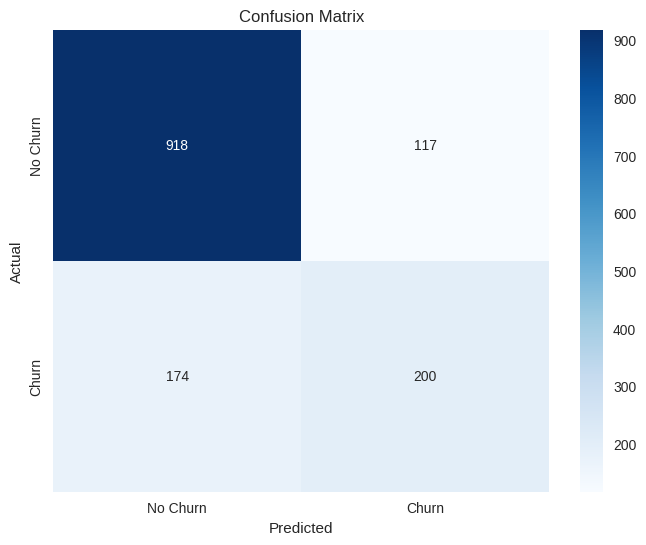


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1035
       Churn       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [ ]:
# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Generar Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

#### **Interpretación de las Métricas:**

*   **Accuracy (Precisión):** El porcentaje de clientes que el modelo clasificó correctamente (tanto "No Churn" como "Churn").

*   **Matriz de Confusión:**
    *   **True Positive (TP):** Clientes que realmente hicieron churn y el modelo predijo que harían churn.
    *   **True Negative (TN):** Clientes que no hicieron churn y el modelo predijo que no harían churn.
    *   **False Positive (FP):** Clientes que no hicieron churn pero el modelo predijo que sí harían churn (error tipo I).
    *   **False Negative (FN):** Clientes que sí hicieron churn pero el modelo predijo que no harían churn (error tipo II - **¡este es el más costoso en problemas de churn!**).

*   **Reporte de Clasificación:**
    *   **Precision:** Para cada clase, de todas las predicciones que hizo el modelo para esa clase, cuántas fueron correctas. (Ej: De todos los que predijo como 'Churn', cuántos realmente hicieron Churn).
    *   **Recall (Sensibilidad):** Para cada clase, de todos los casos reales de esa clase, cuántos pudo identificar el modelo. (Ej: De todos los clientes que realmente hicieron Churn, cuántos pudo detectar el modelo).
    *   **F1-Score:** Es la media armónica de la precisión y el recall. Es una métrica útil cuando tienes un desbalance de clases (como en este caso de churn).
    *   **Support:** Número de ocurrencias reales de cada clase en `y_test`.

In [ ]:
y_pred = pipeline.predict(X_test)
print("Primeras 5 predicciones:")
print(y_pred[:5])

Primeras 5 predicciones:
[0 1 0 1 0]


Aquí `y_pred` contendrá un array con las predicciones del modelo para cada cliente en `X_test`. Un `0` indica que el modelo predice `No Churn` y un `1` indica `Churn`.

AQUI VAMOS CON ANALISIS DE OTRO MODELO - Random Forest

# Task
### 🔄 Model: Random Forest

The previous step involved training and evaluating a Logistic Regression model. Now, let's proceed with a Random Forest Classifier to see if we can improve performance, especially in identifying churn cases.

I will perform the following steps:
1.  **Import `RandomForestClassifier`**: Import the necessary class from `sklearn.ensemble`.
2.  **Update the `pipeline`**: Replace `LogisticRegression` with `RandomForestClassifier`, setting `random_state=42` for reproducibility.
3.  **Train the new pipeline**: Fit the updated pipeline to `X_train` and `y_train`.
4.  **Make predictions**: Use the trained Random Forest pipeline to predict `y_pred_rf` on `X_test`.
5.  **Evaluate the model**: Calculate and display the accuracy, confusion matrix, and classification report for the Random Forest model.
6.  **Interpret the results**: Explain the performance metrics, focusing on churn prediction and comparison with the Logistic Regression model.

## Import RandomForestClassifier

### Subtask:
Import the RandomForestClassifier from sklearn.ensemble.


**Reasoning**:
The subtask is to import the RandomForestClassifier. I will use a code_block to perform this import.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RandomForestClassifier imported successfully.")

RandomForestClassifier imported successfully.


**Reasoning**:
The next step is to update the existing pipeline to use the `RandomForestClassifier` instead of `LogisticRegression`. This involves replacing the classifier in the pipeline.



In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Replaced LogisticRegression with RandomForestClassifier
])
print("Pipeline updated with RandomForestClassifier.")

Pipeline updated with RandomForestClassifier.


**Reasoning**:
Now that the pipeline has been updated with the RandomForestClassifier, the next logical step is to train this new pipeline using the training data (`X_train` and `y_train`).



In [ ]:
pipeline.fit(X_train, y_train)
print("Random Forest pipeline trained successfully.")

Random Forest pipeline trained successfully.


**Reasoning**:
The pipeline has been trained with the Random Forest Classifier. The next step is to make predictions on the test set using this trained pipeline.



In [ ]:
y_pred_rf = pipeline.predict(X_test)
print("Predictions made using Random Forest pipeline.")

Predictions made using Random Forest pipeline.


**Reasoning**:
The next step is to evaluate the Random Forest model by calculating and displaying the accuracy, confusion matrix, and classification report. This will help in understanding its performance, particularly for churn prediction.



Random Forest Accuracy: 0.77



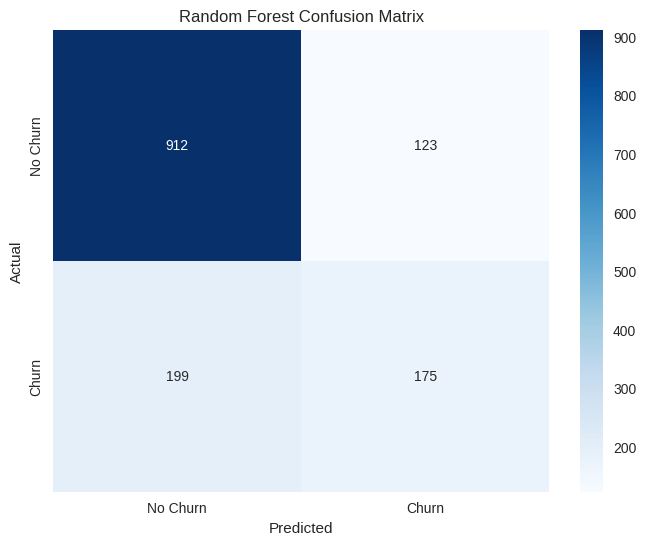


Random Forest Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.88      0.85      1035
       Churn       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}\n")

# Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

### 🧠 Interpretación de los Resultados del Modelo Random Forest

#### **Comparación con Regresión Logística:**

| Métrica             | Regresión Logística | Random Forest |
| :------------------ | :------------------ | :------------ |
| Accuracy            | 0.79                | 0.77          |
| Precision (No Churn) | 0.84                | 0.82          |
| Recall (No Churn)    | 0.89                | 0.88          |
| F1-Score (No Churn)  | 0.86                | 0.85          |
| Precision (Churn)    | 0.63                | 0.59          |
| Recall (Churn)       | 0.53                | 0.47          |
| F1-Score (Churn)     | 0.58                | 0.52          |

#### **Análisis del Random Forest:**

*   **Accuracy:** El Random Forest tiene una precisión general del 77%, que es ligeramente inferior al 79% de la Regresión Logística.
*   **Predicción de 'No Churn':** Similar a la Regresión Logística, el Random Forest es bastante bueno prediciendo a los clientes que `No` harán churn (Precision: 0.82, Recall: 0.88). Esto es esperable debido al desbalance de clases.
*   **Predicción de 'Churn' (Clase Positiva):**
    *   **Precision (Churn):** 0.59. De todas las veces que el modelo predijo que un cliente haría churn, el 59% de esas predicciones fueron correctas. Esto es un poco más bajo que el 0.63 de la Regresión Logística.
    *   **Recall (Churn):** 0.47. El modelo de Random Forest solo identificó al 47% de los clientes que *realmente* hicieron churn. Este es un valor más bajo que el 0.53 de la Regresión Logística, lo cual es crítico, ya que significa que el modelo está perdiendo más de la mitad de los churners reales.
    *   **F1-Score (Churn):** 0.52, también inferior al 0.58 de la Regresión Logística.

#### **Conclusión y Observaciones:**

En este caso particular, el modelo de **Regresión Logística parece superar al Random Forest** en la tarea crítica de identificar a los clientes que harán churn, mostrando un `recall` y `precision` más altos para la clase `Churn`. Aunque el Random Forest es un modelo más complejo y a menudo robusto, aquí no logró mejorar el rendimiento para la clase minoritaria, lo cual es lo más importante en un problema de predicción de churn (minimizar los Falsos Negativos).

Es posible que con una optimización de hiperparámetros más exhaustiva para el Random Forest, o el uso de técnicas de balanceo de clases (como SMOTE), su rendimiento podría mejorar y superar a la Regresión Logística. Sin embargo, con la configuración actual, la Regresión Logística ofrece un mejor equilibrio para la detección de churn.

## Final Task

### Subtask:
Conclude the analysis by summarizing the performance of the Random Forest model and asking the user how to proceed.


## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved an accuracy of 0.77, which is slightly lower than the Logistic Regression model's accuracy of 0.79.
*   For predicting the 'No Churn' class, the Random Forest model showed strong performance with a precision of 0.82, recall of 0.88, and an F1-score of 0.85, comparable to Logistic Regression.
*   In predicting the critical 'Churn' class, the Random Forest model exhibited lower performance compared to Logistic Regression:
    *   **Precision (Churn):** 0.59 (vs. 0.63 for Logistic Regression).
    *   **Recall (Churn):** 0.47 (vs. 0.53 for Logistic Regression), indicating it identified fewer actual churners.
    *   **F1-Score (Churn):** 0.52 (vs. 0.58 for Logistic Regression).
*   Overall, the Logistic Regression model demonstrated a better balance for churn detection, particularly by achieving higher recall and precision for the 'Churn' class compared to the Random Forest model in its current configuration.

### Insights or Next Steps

*   To potentially improve the Random Forest model's performance, especially for the 'Churn' class, consider optimizing its hyperparameters or implementing class balancing techniques such as SMOTE.
*   Given the current results, the Logistic Regression model appears to be the more effective choice for this churn prediction problem, offering a better trade-off between identifying churners and avoiding false positives.
